# Which one is a better plan?

I'm work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

I'm are going to carry out a preliminary analysis of the plans based on a relatively small client selection. I'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. My job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

## Initialization

As always, beginning with libraries

In [1]:
pip install sidetable

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Loading all the libraries
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import pandas as pd
import numpy as np
import math
import sidetable as stb
import datetime as dt
from datetime import timedelta
import scipy.stats as st
from functools import reduce
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns


## Load data

In [3]:
# Load the data files into different DataFrames

try:
    users = pd.read_csv("/Users/victo/Downloads/megaline_users.csv", sep = ',')
    plans = pd.read_csv("/Users/victo/Downloads/megaline_plans.csv", sep = ',')
    messages = pd.read_csv("/Users/victo/Downloads/megaline_messages.csv", sep = ',')
    internet = pd.read_csv("/Users/victo/Downloads/megaline_internet.csv", sep = ',')
    calls = pd.read_csv("/Users/victo/Downloads/megaline_calls.csv", sep = ',')

except:
    users = pd.read_csv("/datasets/megaline_users.csv", sep = ',')
    plans = pd.read_csv("/datasets/megaline_plans.csv", sep = ',')
    messages = pd.read_csv("/datasets/megaline_messages.csv", sep = ',')
    internet = pd.read_csv("/datasets/megaline_internet.csv", sep = ',')
    calls = pd.read_csv("/datasets/megaline_calls.csv", sep = ',')

In [4]:
# let's check the data has been loaded and see preliminary info about them

data_list = [plans, users, calls, messages, internet]

for i in data_list:
    print()
    i.info()
    print()
    print('---------------------------------------------------')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes

---------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    o

Well, first sight - not bad.\
We have no missing value, except **churn_date** in the data frame **users**. But it's normal because this data shows the date the user stopped using the service, and if the data is missing, it means the client has used the service till now.\
Also, all our date-time data, at all data frames where they are, have a non-correct data type - 'object'. I'll change them later.

Now, let's met with data more deeply.

## Prepare the data

Ok. Now we have loaded data frames and got the first information about them.\
Further, I wanna get descriptive statistics about each data frame. I'll fix the wrong data types of columns with dates. \
Also, we have missing values in the data frame **users**, which I'll fill by the date 2019 -01-01, if will not find a better solution.\
This is my preliminary plan. 

## Plans

In [5]:
# let's see the general/summary information about the plans' DataFrame

plans.describe().T

,count,mean,std,min,25%,50%,75%,max
messages_included,2.0,525.00,671.751442,50.00,287.500,525.00,762.500,1000.00
mb_per_month_included,2.0,23040.00,10861.160159,15360.00,19200.000,23040.00,26880.000,30720.00
minutes_included,2.0,1750.00,1767.766953,500.00,1125.000,1750.00,2375.000,3000.00
usd_monthly_pay,2.0,45.00,35.355339,20.00,32.500,45.00,57.500,70.00
usd_per_gb,2.0,8.50,2.121320,7.00,7.750,8.50,9.250,10.00
usd_per_message,2.0,0.02,0.014142,0.01,0.015,0.02,0.025,0.03
usd_per_minute,2.0,0.02,0.014142,0.01,0.015,0.02,0.025,0.03


In [6]:
# let's print data for plans

plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


There is no missing data in the table, and all data types specified are correct. The column names are also correct.\
I see that the price of the **ultimate** package is 3.5 times more than the **surf**, while its traffic volume is 2 times the most. In the age of smartphones, this is an important indicator.\
I guess the surf plan is more popular with the clients.

## Users

In [7]:
# get the general/summary information about the users' DataFrame

users.describe().T
users.describe(include = 'object').T

,count,mean,std,min,25%,50%,75%,max
user_id,500.0,1249.500,144.481833,1000.0,1124.75,1249.5,1374.25,1499.0
age,500.0,45.486,16.972269,18.0,30.00,46.0,61.00,75.0


,count,unique,top,freq
first_name,500,458,Leonila,3
last_name,500,399,Brock,3
city,500,73,"New York-Newark-Jersey City, NY-NJ-PA MSA",80
reg_date,500,266,2018-03-08,5
plan,500,2,surf,339
churn_date,34,29,2018-12-18,3


In [8]:
# let's see on a sample of data for users

users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


So we have 500 observations. I'll deal with the missing data and data type later, but now starting with age. \
Our clients are between 18 and 75 years old, with a mean age of 45,486 and a median of 46. The mean and median are almost the same, but the distribution is still a bit left-skewed.

The next interesting observation - it's the frequency of each plan. Let's see.

In [9]:
# also, it would be interesting to sample percent of registered customers with plan surf and
# percent customers with plan surf who closed contracts

users.stb.freq(['plan'], style = True)
users.dropna(subset = ['churn_date']).stb.freq(['plan'], style = True)

,plan,count,percent,cumulative_count,cumulative_percent
0,surf,339,67.80%,339,67.80%
1,ultimate,161,32.20%,500,100.00%


,plan,count,percent,cumulative_count,cumulative_percent
0,surf,23,67.65%,23,67.65%
1,ultimate,11,32.35%,34,100.00%


In [10]:
# let's check have we a users with two plans

users.loc[:, 'user_id': 'city'].duplicated().sum()

0

We see that 67.8% of customers prefer the surf plan, and 32.2% the ultimate. But what is more interesting, closed contracts appeared with almost the same frequency of 67.65% and 32.35%, respectively. The numbers are very similar and it looks suspicious to me.\
There are two options.\
First - customers stopped using the service and went to another provider. Then it's not about the plan, but about the overall satisfaction with the service.\
The second - there is an internal cannibalization by one plan of the second. Is this so - it will be possible to see by its activity in data frames calls, messages, Internet.\
For now, I'll see how users of different plans are distributed depending on age.

In [11]:
# let's make age categories

def age_group(age):
    if age <= 25:
        return 'up to 25'
    if age <= 35:
        return '26-35'
    if age <= 45:
        return '36-45'
    if age <= 55:
        return '46-55'
    if age <= 65:
        return '56-65'
    if age > 65:
        return 'above 65'

# add a new column to data with age categories respectively
users['age_group'] = users.age.apply(age_group)

# let's print separate data of the ultimate plan, the surf plan, and the general
print()
print('Ultimate plan')
users.query('plan == "ultimate"').stb.freq(['age_group'], style = True)
print('-----------------------------------------------------------')
print('Surf plan')
users.query('plan == "surf"').stb.freq(['age_group'], style = True)
print('-----------------------------------------------------------')
print('General')
users.stb.freq(['age_group'], style = True)
print('-----------------------------------------------------------')




Ultimate plan


,age_group,count,percent,cumulative_count,cumulative_percent
0,46-55,33,20.50%,33,20.50%
1,56-65,29,18.01%,62,38.51%
2,above 65,27,16.77%,89,55.28%
3,36-45,25,15.53%,114,70.81%
4,26-35,25,15.53%,139,86.34%
5,up to 25,22,13.66%,161,100.00%


-----------------------------------------------------------
Surf plan


,age_group,count,percent,cumulative_count,cumulative_percent
0,26-35,72,21.24%,72,21.24%
1,46-55,55,16.22%,127,37.46%
2,above 65,54,15.93%,181,53.39%
3,56-65,54,15.93%,235,69.32%
4,36-45,53,15.63%,288,84.96%
5,up to 25,51,15.04%,339,100.00%


-----------------------------------------------------------
General


,age_group,count,percent,cumulative_count,cumulative_percent
0,26-35,97,19.40%,97,19.40%
1,46-55,88,17.60%,185,37.00%
2,56-65,83,16.60%,268,53.60%
3,above 65,81,16.20%,349,69.80%
4,36-45,78,15.60%,427,85.40%
5,up to 25,73,14.60%,500,100.00%


-----------------------------------------------------------


What do we see?\
**Ultimate plan**: main consumers aged 46 to 75 years. This can be explained by both the higher cost of the plan and the consumer habits of customers. The older generation is used to calling and texting more; at the time of the formation of their consumer taste, the Internet was not very good.\
**Plan surf**: the main group was users from 26 to 35 years old. But the same terrible age group from 46 to 75 went further. The lower price attracts almost everyone.\
!But\
The loss of the age group of 36-45 years looks strange. It is poorly represented in both tariff plans, and I cannot understand the reason.

Next - let's look at the year of registration.

In [12]:
# For simplicity, I will check how many clients registered in 2018

len(users[users.reg_date.str.contains(pat = '2018')])

500

Ha, all of them registered at 2018. As this representative sample, it means all of them to have one year term. For this reason, I just add 1 year for the date of registration, when filling column churn_date.\
Piece of cake.

It remains to check for duplicates.

In [13]:
# well, now check the duplicates in data

users.duplicated().sum()

0

In [14]:
# and check implicity duplicates in column city

np.sort(users.city.unique())

array(['Albany-Schenectady-Troy, NY MSA', 'Albuquerque, NM MSA',
       'Atlanta-Sandy Springs-Roswell, GA MSA',
       'Austin-Round Rock-Georgetown, TX MSA', 'Bakersfield, CA MSA',
       'Baltimore-Columbia-Towson, MD MSA', 'Baton Rouge, LA MSA',
       'Birmingham-Hoover, AL MSA', 'Boston-Cambridge-Newton, MA-NH MSA',
       'Bridgeport-Stamford-Norwalk, CT MSA',
       'Buffalo-Cheektowaga, NY MSA', 'Cape Coral-Fort Myers, FL MSA',
       'Charleston-North Charleston, SC MSA',
       'Charlotte-Concord-Gastonia, NC-SC MSA',
       'Chicago-Naperville-Elgin, IL-IN-WI MSA',
       'Cincinnati, OH-KY-IN MSA', 'Cleveland-Elyria, OH MSA',
       'Colorado Springs, CO MSA', 'Columbia, SC MSA', 'Columbus, OH MSA',
       'Dallas-Fort Worth-Arlington, TX MSA', 'Dayton-Kettering, OH MSA',
       'Denver-Aurora-Lakewood, CO MSA',
       'Detroit-Warren-Dearborn, MI MSA', 'El Paso, TX MSA',
       'Fresno, CA MSA', 'Grand Rapids-Kentwood, MI MSA',
       'Greensboro-High Point, NC MSA',
    

In [15]:
users = users.reindex(columns = ['user_id', 'first_name', 'last_name', 'age', 'age_group','city',  'reg_date', 'plan', 'churn_date'])
users.head()

,user_id,first_name,last_name,age,age_group,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,36-45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,26-35,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,36-45,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,46-55,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,36-45,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


Well, what story do our users tell us?

Our clients range from 18 to 75 years old and the median age was 46.\
About 32% of them prefer the more expensive **ultimate** plan, with people aged 46 to 75 more likely to opt for it. This can be explained by the fact that these are often already established people with a good income.\
A more affordable **surf** package is preferred by the remaining 68% of customers, and it is most often chosen by young people aged 26 to 35. This is also intuitive, given that at this age people are just starting to build a career, and the issue of finance is acute.\
In general, it looks like the company is more busy attracting new customers than retaining old ones. Judge for yourself: we start with the smallest age group (up to 25), after a breakthrough to the largest (26-35), then fall to the second from the end of the group (36-45), growth again in the next group (46-55) and then smooth decline. In theory, clients should have flowed smoothly from one group to another, and not show gaps of 4 -5%.


### Fix Data

We have a problem with the data type of reg_date and churn_date. Also, I want to fill missing values in churn_date.

In [16]:
#let's change the data type
users.reg_date = pd.to_datetime(users.reg_date, format = '%Y-%m-%d')
users.churn_date = pd.to_datetime(users.churn_date, format = '%Y-%m-%d')

#now I'll fill in the missing values

for row in users:
    users.loc[users.churn_date.isna(), 'churn_date'] = users.loc[users.churn_date.isna(), 'reg_date'] + timedelta(days = 365)


Additionally, I'll add a few dictionaries for simplificient next work with data.

In [17]:
# let's create a few dictionarys with name of plan and with churn date

users_dictionary = dict(zip(users.user_id, users.plan))
users_churn_dictionary = dict(zip(users.user_id, users.churn_date))
plans_dictionary = {'surf': 1, 'ultimate': 2}

## Calls

In [18]:
# Print the general/summary information about the calls' DataFrame

calls.describe().T
calls.describe(include = 'object').T
calls.groupby('user_id')['id'].count().describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,137735.0,1247.658046,139.416268,1000.0,1128.00,1247.00,1365.00,1499.0
duration,137735.0,6.745927,5.839241,0.0,1.29,5.98,10.69,37.6


,count,unique,top,freq
id,137735,137735,1151_51,1
call_date,137735,351,2018-12-27,1091


count     481.000000
mean      286.351351
std       238.182107
min         2.000000
25%       108.000000
50%       216.000000
75%       413.000000
max      1300.000000
Name: id, dtype: float64

In [19]:
# Print a sample of data for calls

calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


Now, let's check: the clients who churned the plan changed the plan or left our company.\
For this - I'll print the clients with the earliest churn date, and check if he has called after the period of the plan. 

In [20]:
# let's print the client with the earliest churn date
users.query('churn_date < "2019-01-01"').sort_values(by = ['churn_date']).head(1)


# let's check has the client 1246 called after the period of the plan.
calls.query('user_id == 1246 & ("2018-01-09" > call_date | call_date > "2018-07-31")')


,user_id,first_name,last_name,age,age_group,city,reg_date,plan,churn_date
246,1246,Stevie,Moran,69,above 65,"Tampa-St. Petersburg-Clearwater, FL MSA",2018-01-09,ultimate,2018-07-31


,id,user_id,call_date,duration
67981,1246_0,1246,2018-08-24,9.03
67982,1246_1,1246,2018-08-11,20.89
67985,1246_4,1246,2018-08-11,13.18
67992,1246_11,1246,2018-08-12,15.27
68009,1246_28,1246,2018-08-31,2.25
...,...,...,...,...
68656,1246_675,1246,2018-08-08,0.00
68657,1246_676,1246,2018-08-03,13.27
68660,1246_679,1246,2018-08-16,6.61
68662,1246_681,1246,2018-08-06,0.00


So.\
On average, customers spent 6.75 minutes talking, with a median of 5.98. We can see that the maximum call duration was 37.6 minutes, which is clearly an outlier.\
The check showed that the client with ID 1246 made calls after the outflow date (136 observations and most are greater than 0), which means that he switched to another plan, and did not completely leave the company. It's a good news.

Next, I plan to correct the data type for the calls_date column and round the value to an integer in the duration column.

### Fix data

In [21]:
# at first - change the data type for call_date
calls.call_date = pd.to_datetime(calls.call_date, format = '%Y-%m-%d')

# now, rounding the duration of calls to integer minutes
calls['duration'] = np.ceil(calls['duration']).astype('int')
#calls.duration = [math.ceil(number) for number in calls.duration]
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(1)
memory usage: 3.7+ MB


### Enrich data

We figured out the data type, the duration of the calls was rounded to the nearest integer.\
Now I want to add a month column and also fix the plan name in positions where the call date is greater than the churn date.

In [22]:
# let's get the month
calls['month'] = calls.call_date.dt.month

#let's get the plan's name and churn date new columns
calls['plan'] = calls.user_id.map(users_dictionary)
calls['churn_date'] = calls.user_id.map(users_churn_dictionary)

# check user 1246 before I'll changing plan's name
calls[calls['user_id'] == 1246].head()

# make a mask and change plan's name
mask_calls_ultimate = (calls.call_date > calls.churn_date) & (calls.plan == 'ultimate')
mask_calls_surf = (calls.call_date > calls.churn_date) & (calls.plan == 'surf')

calls.loc[mask_calls_ultimate, 'plan'] = 'surf'
calls.loc[mask_calls_surf, 'plan'] = 'ultimate'

# check user 1246 after I changed plan's name
calls[calls['user_id'] == 1246].head()

,id,user_id,call_date,duration,month,plan,churn_date
67981,1246_0,1246,2018-08-24,10,8,ultimate,2018-07-31
67982,1246_1,1246,2018-08-11,21,8,ultimate,2018-07-31
67983,1246_2,1246,2018-07-14,4,7,ultimate,2018-07-31
67984,1246_3,1246,2018-05-06,0,5,ultimate,2018-07-31
67985,1246_4,1246,2018-08-11,14,8,ultimate,2018-07-31


,id,user_id,call_date,duration,month,plan,churn_date
67981,1246_0,1246,2018-08-24,10,8,surf,2018-07-31
67982,1246_1,1246,2018-08-11,21,8,surf,2018-07-31
67983,1246_2,1246,2018-07-14,4,7,ultimate,2018-07-31
67984,1246_3,1246,2018-05-06,0,5,ultimate,2018-07-31
67985,1246_4,1246,2018-08-11,14,8,surf,2018-07-31


## Messages

In [23]:
# Print the general/summary information about the messages' DataFrame

messages.describe().T
messages.describe(include = 'object').T
messages.groupby('user_id')['id'].agg('count').describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,76051.0,1245.972768,139.843635,1000.0,1123.0,1251.0,1362.0,1497.0


,count,unique,top,freq
id,76051,76051,1151_51,1
message_date,76051,351,2018-12-28,702


count     402.000000
mean      189.181592
std       192.207920
min         1.000000
25%        60.000000
50%       126.500000
75%       258.750000
max      1288.000000
Name: id, dtype: float64

In [24]:
# Print a sample of data for messages

messages.head()


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


So, we see that clients sent from 1 to 1288 messages throughout the year, with average 189 and median of 126.5 messages (10 messages per month).

Next, I'm going to change the data type in the message_date column, and change the name of the plan for clients from chorn_date to 2019-01-01.

### Fix data

In [25]:
#let's change the data type of the values in the column message_date
messages.message_date = pd.to_datetime(messages.message_date, format = '%Y-%m-%d')
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Enrich data

Fine.
It remains to add a column with the month and change the name of the plan for the corresponding rows.

In [26]:
# let's get the month
messages['month'] = messages.message_date.dt.month

#let's get the plan's name and churn date
messages['plan'] = messages.user_id.map(users_dictionary)
messages['churn_date'] = messages.user_id.map(users_churn_dictionary)

# check user 1246 before I'll changing plan's name
messages[messages['user_id'] == 1246].head()

# make a mask and change plan's name
mask_messages_ultimate = (messages.message_date > messages.churn_date) & (messages.plan == 'ultimate')
mask_messages_surf = (messages.message_date > messages.churn_date) & (messages.plan == 'surf')

messages.loc[mask_messages_ultimate, 'plan'] = 'surf'
messages.loc[mask_messages_surf, 'plan'] = 'ultimate'

# check user 1246 after I changed plan's name
messages[messages['user_id'] == 1246].head()

,id,user_id,message_date,month,plan,churn_date
36696,1246_0,1246,2018-06-22,6,ultimate,2018-07-31
36697,1246_1,1246,2018-08-02,8,ultimate,2018-07-31
36698,1246_2,1246,2018-02-06,2,ultimate,2018-07-31
36699,1246_3,1246,2018-05-29,5,ultimate,2018-07-31
36700,1246_4,1246,2018-02-04,2,ultimate,2018-07-31


,id,user_id,message_date,month,plan,churn_date
36696,1246_0,1246,2018-06-22,6,ultimate,2018-07-31
36697,1246_1,1246,2018-08-02,8,surf,2018-07-31
36698,1246_2,1246,2018-02-06,2,ultimate,2018-07-31
36699,1246_3,1246,2018-05-29,5,ultimate,2018-07-31
36700,1246_4,1246,2018-02-04,2,ultimate,2018-07-31


## Internet

In [27]:
# Print the general/summary information about the internet DataFrame

internet.describe().T
internet.describe(include = 'object').T
internet.groupby('user_id')['mb_used'].sum().describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,104825.0,1242.496361,142.053913,1000.0,1122.00,1236.00,1367.00,1499.00
mb_used,104825.0,366.713701,277.170542,0.0,136.08,343.98,554.61,1693.47


,count,unique,top,freq
id,104825,104825,1151_51,1
session_date,104825,351,2018-12-24,851


count       489.000000
mean      78610.968732
std       61940.374028
min          92.680000
25%       29401.530000
50%       62354.370000
75%      115737.760000
max      390159.350000
Name: mb_used, dtype: float64

In [28]:
# Print a sample of data for the internet traffic
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


So, we can see that users consume from 0 to 1693 mb with an average of 367 mb and a median of 344 mb.

Next, I'm going to change the data type in the session_date field, add a column with the month value, and deal with the value in the plan column.

### Fix data

In [29]:
#let's change the data type of the values in the column session_date
internet.session_date = pd.to_datetime(internet.session_date, format = '%Y-%m-%d')

internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Enrich data

In [30]:
# let's get the month
internet['month'] = internet.session_date.dt.month

#let's get the plan's name and churn date
internet['plan'] = internet.user_id.map(users_dictionary)
internet['churn_date'] = internet.user_id.map(users_churn_dictionary)

# check user 1246 before I'll changing plan's name
internet[internet['user_id'] == 1246].tail()

# make a mask and change plan's name
mask_internet_ultimate = (internet.session_date > internet.churn_date) & (internet.plan == 'ultimate')
mask_internet_surf = (internet.session_date > internet.churn_date) & (internet.plan == 'surf')

internet.loc[mask_internet_ultimate, 'plan'] = 'surf'
internet.loc[mask_internet_surf, 'plan'] = 'ultimate'

# check user 1246 after I changed plan's name
internet[internet['user_id'] == 1246].tail()

,id,user_id,session_date,mb_used,month,plan,churn_date
54580,1246_481,1246,2018-04-18,347.17,4,ultimate,2018-07-31
54581,1246_482,1246,2018-09-13,251.85,9,ultimate,2018-07-31
54582,1246_483,1246,2018-05-19,611.44,5,ultimate,2018-07-31
54583,1246_484,1246,2018-03-06,533.78,3,ultimate,2018-07-31
54584,1246_485,1246,2018-04-16,454.95,4,ultimate,2018-07-31


,id,user_id,session_date,mb_used,month,plan,churn_date
54580,1246_481,1246,2018-04-18,347.17,4,ultimate,2018-07-31
54581,1246_482,1246,2018-09-13,251.85,9,surf,2018-07-31
54582,1246_483,1246,2018-05-19,611.44,5,ultimate,2018-07-31
54583,1246_484,1246,2018-03-06,533.78,3,ultimate,2018-07-31
54584,1246_485,1246,2018-04-16,454.95,4,ultimate,2018-07-31


### Conclusion 1 

So, at this stage of the project, we loaded 5 data frames and displayed general information and descriptive statistics for each. Identified values with the wrong data type in the data frames **users**, **calls**, **messages**, **Internet**, and later fixed it. We found the missing values in the **users** data frame, found out their nature, and filled in the calculated data. We also added a column with age categories for analysis.\
In date frames **calls**, **messages**, and **Internet** added columns with month, plan, and churn date.\
And of course, we checked the **users** date frame for duplicates.

We found out that we have two plans **surf** and **ultimate**, and the monthly payment for **ultimate** is 3.5 times more than **surf**. I suppose this is the main reason why users of the surf and ultimate plans are represented in a 2:1 ratio. It is interesting to note that users who have churned plans are represented in the same proportion.\
Later, we found out that these users who churned plans continued to use the company's services, which was due to the transition of customers from one plan to another, and not an outflow.

Also we get, what the company works with users aged 18 to 75 years. The average age of a user is 45.5 years, and the median is 46. Most often, the sample includes users in the category **26-35** years old, and least often in the category **under 25**. From the unusual - also not very often presented users in the category **36-45** years old. And this is not a small drawdown, but a dip between the **26-35** and **46-55** groups. Why this is so is impossible to say with the existing data set.\
Lastly, in terms of users, users from the sample are represented in 73 out of 384 MSAs, which is 19%.

In terms of services consumed, users **on average**: make about 24 calls lasting about 7 minutes per month, write 16 messages per month (189 per year) and consume 6550 MB per month (78610 MB per year).\
The average for all three services exceed their respective median, making their distribution skewed to the right, which is generally typical.

**What's next?**\
Next, for each user, I will calculate the duration of calls, their number, the number of messages, and the amount of Internet consumed (in MB and GB) and aggregated them monthly.\
After that, I will merge the aggregated data for calls, messages, the internet, and users. To merge, I need to use the **user_id**, **month**, and **plan** columns.\
!BUT\
This is a combination of three levels and it can give unexpected results. Therefore, we will go the long way.
We will merge the data using the **user_id** and **month** columns, but we will create two tables. One for surf users and one for ultimate users. And then we will connect them to one another.\
And after that, I will calculate the revenue for each user by month.

## Study plan conditions

In [31]:
# Print out the plan conditions and make sure they are clear for you

plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Aggregate data per user

Now, as the data is clean, I'll aggregate data per user per period in order to have just one record per user per period. It should ease the further analysis a lot.

In [32]:
# Calculate the amount of minutes spent by each user per month. Save the result.

calls_pt = calls.pivot_table(index = ['user_id', 'month', 'plan'], values = 'duration', aggfunc = ['sum', 'count'])
calls_pt = calls_pt.reset_index()

# rename the names of columns
calls_pt.columns = ['user_id', 'month', 'plan', 'calls_duration', 'calls']

In [33]:
# Calculate the number of messages sent by each user per month. Save the result.

messages_pt = messages.pivot_table(index = ['user_id', 'month', 'plan'], values = 'id', aggfunc = 'count')
messages_pt = messages_pt.reset_index()
messages_pt.rename(columns = {'id': 'messages'}, inplace = True)

# change the order of the columns to simplify the next slicing data
messages_pt = messages_pt.reindex(columns = ['user_id','month', 'messages', 'plan'])

#don't like a long string of code, for this reason making slices for the next merge
messages_pt_surf = messages_pt.loc[messages_pt.plan == "surf",'user_id':'messages']
messages_pt_ultimate = messages_pt.loc[messages_pt.plan == "ultimate",'user_id':'messages']

In [34]:
# Calculate the volume of internet traffic used by each user per month. Save the result.
mb_to_gb = 0.001
internet_pt = internet.pivot_table(index = ['user_id', 'month', 'plan'], values = 'mb_used', aggfunc = 'sum')
internet_pt['gb_used'] = internet_pt.mb_used * mb_to_gb
internet_pt.gb_used = [math.ceil(number) for number in internet_pt.gb_used]
internet_pt = internet_pt.reset_index()

# change the order of the columns to simplify the next slicing data
internet_pt = internet_pt.reindex(columns =['user_id', 'month', 'mb_used', 'gb_used', 'plan'])

#don't like a long string of code, for this reason making slices for the next merge
internet_pt_surf = internet_pt.loc[internet_pt.plan == "surf", 'user_id':'gb_used']
internet_pt_ultimate = internet_pt.loc[internet_pt.plan == "ultimate", 'user_id':'gb_used']

What's next?

I'm using data frame **calls** as the base for the merge. I will add messages, Internet, and personal data of users to it.\
After, I will fill in the missing values.

In [35]:
# make two set with the source for the merge
data_surf = [calls_pt.query('plan == "surf"'), messages_pt_surf, internet_pt_surf]
data_ultimate = [calls_pt.query('plan == "ultimate"'), messages_pt_ultimate, internet_pt_ultimate]

# merge the surfs plan data
used_surf = reduce(lambda left, right:pd.merge(left, right, on = ['user_id', 'month'], how = 'outer'), data_surf)

# make the set for merge surfs plan data and users data  
data_users_surf = [used_surf, users.loc[:, 'user_id':'city']]

#merge surfs plan data and users data  
users_used_surf = reduce(lambda left, right:pd.merge(left, right, on = ['user_id'], how = 'left'), data_users_surf)

# merge the ultimate plan data
used_ultimate = reduce(lambda left, right:pd.merge(left, right, on = ['user_id', 'month'], how = 'outer'), data_ultimate)

# make the set for merge ultimates plan data and users data 
data_users_ultimate = [used_ultimate, users.loc[:, 'user_id':'city']]

#merge ultimates plan data and users data
users_used_ultimate = reduce(lambda left, right:pd.merge(left, right, on = ['user_id'], how = 'left'), data_users_ultimate)

# filling the missing value in the column "plan" at both data frames
users_used_surf.plan.fillna(value = 'surf', inplace = True)
users_used_ultimate.plan.fillna(value = 'ultimate', inplace = True)

# filling the missing value by 0 at both data frames
users_used_surf.fillna(value = 0, inplace = True)
users_used_ultimate.fillna(value = 0, inplace = True)

# print the samples of both data frames
users_used_surf.tail()
users_used_ultimate.tail()

,user_id,month,plan,calls_duration,calls,messages,mb_used,gb_used,first_name,last_name,age,age_group,city
1560,1194,12,surf,0.0,0.0,56.0,31088.49,32.0,Robert,Mclean,40,36-45,"San Jose-Sunnyvale-Santa Clara, CA MSA"
1561,1349,10,surf,0.0,0.0,76.0,13093.55,14.0,Florentina,Diaz,69,above 65,"Boston-Cambridge-Newton, MA-NH MSA"
1562,1349,11,surf,0.0,0.0,72.0,17128.26,18.0,Florentina,Diaz,69,above 65,"Boston-Cambridge-Newton, MA-NH MSA"
1563,1349,12,surf,0.0,0.0,61.0,13039.91,14.0,Florentina,Diaz,69,above 65,"Boston-Cambridge-Newton, MA-NH MSA"
1564,1361,5,surf,0.0,0.0,2.0,1519.69,2.0,Jacelyn,Hoffman,45,36-45,"Birmingham-Hoover, AL MSA"


,user_id,month,plan,calls_duration,calls,messages,mb_used,gb_used,first_name,last_name,age,age_group,city
748,1204,12,ultimate,0.0,0.0,78.0,36730.05,37.0,Sherly,Levy,44,36-45,"Chicago-Naperville-Elgin, IL-IN-WI MSA"
749,1224,6,ultimate,0.0,0.0,5.0,2966.21,3.0,Kelly,Cole,74,above 65,"Atlanta-Sandy Springs-Roswell, GA MSA"
750,1482,10,ultimate,0.0,0.0,2.0,0.00,0.0,Armand,Glenn,70,above 65,"New York-Newark-Jersey City, NY-NJ-PA MSA"
751,1108,12,ultimate,0.0,0.0,0.0,233.17,1.0,Porfirio,Kane,45,36-45,"Salt Lake City, UT MSA"
752,1311,6,ultimate,0.0,0.0,0.0,1498.83,2.0,Cherlyn,Saunders,69,above 65,"Memphis, TN-MS-AR MSA"


In [36]:
# Add the plan information

plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


I'm going to calculate the monthly revenue from each user. To finish this I'll make a function, subtracting the free package limit from the total number of calls, text messages, and data. After this, it will multiply the result by the calling plan value, and add the monthly charge depending on the calling plan.

In [37]:
# Calculate the monthly revenue for each user

def cost(row):
    # definitions of variable values
    duration = row['calls_duration']
    message = row['messages']
    gb_used = row['gb_used']
    mb_used = row['mb_used']
    plan = row['plan']
    # make counters
    plan_cost = 0
    calls_cost = 0
    message_cost = 0
    internet_cost = 0
    total_cost = 0
    # get limits of the internet by plans
    gb_included_ultimate = 30
    gb_included_surf = 15
    # loops for ultimate plan
    if plan == 'ultimate':
        plan_cost = plans.usd_monthly_pay.max()
        calls_cost = np.where(duration< plans.minutes_included.max(), 0, (duration - plans.minutes_included.max())*plans.usd_per_minute.min())
        message_cost = np.where(message < plans.messages_included.max(), 0, (message - plans.messages_included.max())*plans.usd_per_message.min())
        internet_cost = np.where(mb_used < plans.mb_per_month_included.max(), 0, (gb_used - gb_included_ultimate)*plans.usd_per_gb.min())
    #loops for surf plan
    if plan == 'surf':
        plan_cost = plans.usd_monthly_pay.min()
        calls_cost = np.where(duration< plans.minutes_included.min(), 0, (duration - plans.minutes_included.min())*plans.usd_per_minute.max())
        message_cost = np.where(message < plans.messages_included.min(), 0, (message - plans.messages_included.min())*plans.usd_per_message.max())
        internet_cost = np.where(mb_used < plans.mb_per_month_included.min(), 0, (gb_used - gb_included_surf)*plans.usd_per_gb.max())
    total_cost = plan_cost + calls_cost + message_cost + internet_cost
    return total_cost

#add calculations to the new columns "total_cost"
users_used_surf['total_cost'] = users_used_surf.apply(cost, axis = 1)
users_used_ultimate['total_cost'] = users_used_ultimate.apply(cost, axis = 1)

#print samples of data frames
users_used_surf.head()
users_used_ultimate.head()

#concating data frames to one "user_used"
users_used = pd.concat([users_used_surf, users_used_ultimate])

,user_id,month,plan,calls_duration,calls,messages,mb_used,gb_used,first_name,last_name,age,age_group,city,total_cost
0,1001,8,surf,182.0,27.0,30.0,6919.15,7.0,Mickey,Wilkerson,28,26-35,"Seattle-Tacoma-Bellevue, WA MSA",20.00
1,1001,9,surf,315.0,49.0,44.0,13314.82,14.0,Mickey,Wilkerson,28,26-35,"Seattle-Tacoma-Bellevue, WA MSA",20.00
2,1001,10,surf,393.0,65.0,53.0,22330.49,23.0,Mickey,Wilkerson,28,26-35,"Seattle-Tacoma-Bellevue, WA MSA",100.09
3,1001,11,surf,426.0,64.0,36.0,18504.30,19.0,Mickey,Wilkerson,28,26-35,"Seattle-Tacoma-Bellevue, WA MSA",60.00
4,1001,12,surf,412.0,56.0,44.0,19369.18,20.0,Mickey,Wilkerson,28,26-35,"Seattle-Tacoma-Bellevue, WA MSA",70.00


,user_id,month,plan,calls_duration,calls,messages,mb_used,gb_used,first_name,last_name,age,age_group,city,total_cost
0,1000,12,ultimate,124.0,16.0,11.0,1901.47,2.0,Anamaria,Bauer,45,36-45,"Atlanta-Sandy Springs-Roswell, GA MSA",70.0
1,1006,11,ultimate,10.0,2.0,15.0,2068.37,3.0,Jesusa,Bradford,73,above 65,"San Francisco-Oakland-Berkeley, CA MSA",70.0
2,1006,12,ultimate,36.0,7.0,89.0,20267.44,21.0,Jesusa,Bradford,73,above 65,"San Francisco-Oakland-Berkeley, CA MSA",70.0
3,1008,10,ultimate,476.0,71.0,21.0,17106.99,18.0,Emely,Hoffman,53,46-55,"Orlando-Kissimmee-Sanford, FL MSA",70.0
4,1008,11,ultimate,446.0,63.0,37.0,23676.72,24.0,Emely,Hoffman,53,46-55,"Orlando-Kissimmee-Sanford, FL MSA",70.0


### Conclusion 2

At this stage of the project we:\
For each of the data frames: calls, messages, Internet - we created a pivot table, where we aggregated data by client and month. Where it was necessary - changed the names of the columns and reset the index.\
In the created tables messages_pt and internet_pt, we changed the arrangement of the columns and created slices for each plan separately.\
Using the redux function, we merged three tables and added personal data from the user's data frame.\
We filled in all the empty values in the plan column, in accordance with the plan for which the table was compiled. After that, all remaining missing values were filled in with zero.\
Next, we created a function for calculating revenue from each user and calculated it.\
Well, after that concating data frames to one "user_used".

## Study user behaviour

At this stage, I plan to calculate the indicators of mathematical expectation, standard deviation, as well as the coefficient of variation for each plan, for each service (communication, messages, Internet). Also, I’ll look at the graphs to see how the averages are distributed and what volume of services users of different plans used.\
In the end, I want to build a correlation graph. Let's get started.

### Calls

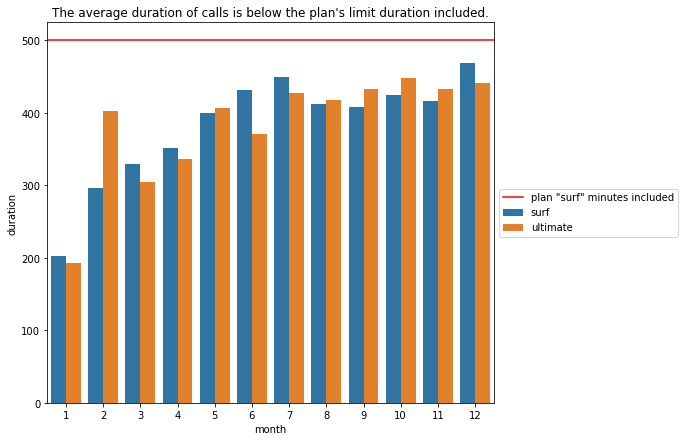

In [38]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.

calls_avg_duration_monthly = pd.DataFrame(users_used.groupby(['plan','month'])['calls_duration'].mean()).reset_index()
fig, ax = plt.subplots(figsize=(8,7))
ax = sns.barplot(data = calls_avg_duration_monthly, x='month', y='calls_duration', hue = 'plan').set(title="The average duration of calls is below the plan's limit duration included.", xlabel = 'month', ylabel='duration')
plt.axhline(y=500, xmin=0, xmax=13, c="red", label= 'plan "surf" minutes included')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

[Text(0, 0.5, 'number of users')]

[Text(0.5, 1.0, 'The duration of calls is increased to the proportion of an increasing number of users.'),
 Text(0.5, 0, 'month'),
 Text(0, 0.5, 'duration')]

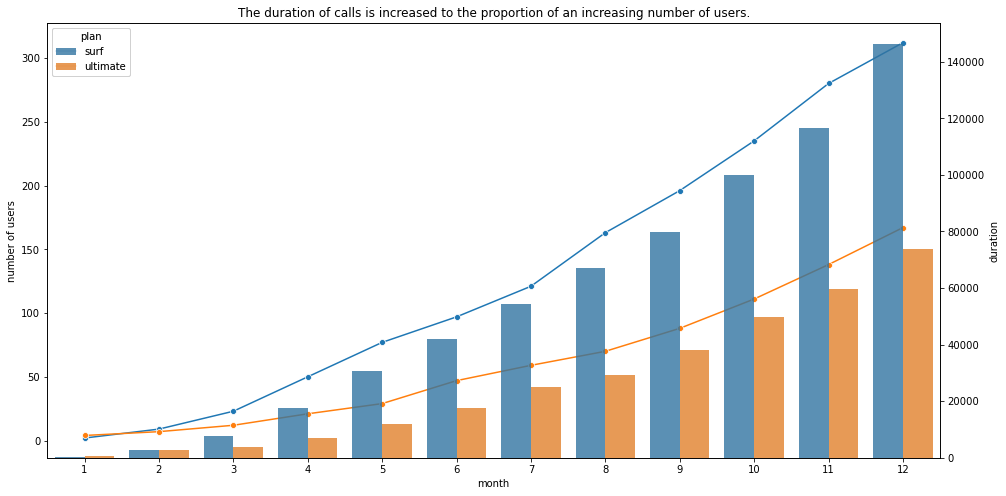

In [39]:
# Compare the calls duration users of each plan require each month. Plot a barchart.
calls_monthly_pt = users_used.pivot_table(index = ['plan', 'month'], values=['calls_duration', 'user_id'],aggfunc = {'calls_duration':'sum', 'user_id':'count'}).reset_index()
calls_monthly_pt.month = calls_monthly_pt.month.astype('str')

#calls_monthly_pt
fig, ax1 = plt.subplots(figsize=(16,8))
sns.lineplot(data=calls_monthly_pt, x='month', y='user_id',marker = 'o',hue = 'plan', sort = False, ax=ax1).set(ylabel = 'number of users')
ax2 = ax1.twinx()
sns.barplot(data = calls_monthly_pt, x='month', y='calls_duration', hue = 'plan', alpha=0.8, ax=ax2).set(title = 'The duration of calls is increased to the proportion of an increasing number of users.', xlabel = 'month', ylabel = 'duration')
plt.show()

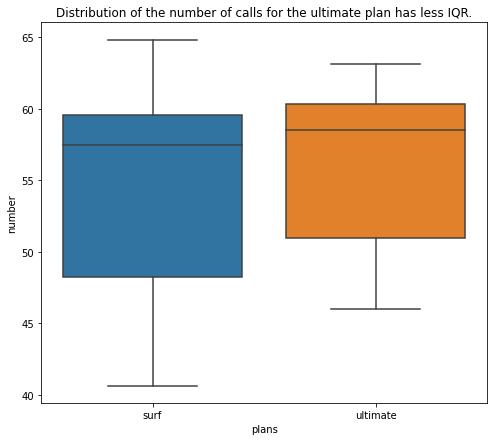

In [40]:
# Looks at the distribution of the number the calls by plans. Plot a boxplot.

# grouped the data for building the boxplot
calls_number = pd.DataFrame(users_used.groupby(['plan','month'])['calls'].mean()).reset_index()

#ploting
fig, ax = plt.subplots(figsize=(8,7))
ax = sns.boxplot(data = calls_number, x ='plan', y='calls', showfliers = False).set(title = 'Distribution of the number of calls for the ultimate plan has less IQR.', xlabel='plans', ylabel='number')
plt.show()

Now, I'm going to calculate the mean, the variable of the call duration, and the coefficient of variation to look at whether users on the different plans have different behaviors for their calls.

[Text(0.5, 1.0, 'Disrtibution of calls duration by plans'),
 Text(0.5, 0, 'duration'),
 Text(0, 0.5, 'frequency')]

[Text(0.5, 1.0, 'Disrtibution of calls duration by plans'),
 Text(0.5, 0, 'plans'),
 Text(0, 0.5, 'duration')]

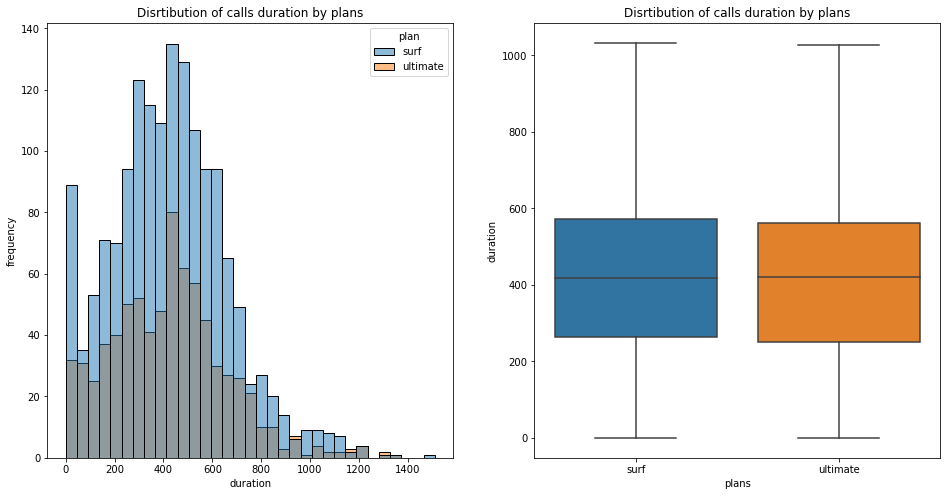

plan,surf,ultimate
mean,425.140575,423.641434
var,55410.023704,57766.740940
std,235.393338,240.347126


----------------------------------------
For plan Surf

Average is  425.14
Centered around average
Most of the data can be found in range: 0 -  1130.0
----------------------------------------

For plan Ultimate

Average is  423.64
Centered around average
Most of the data can be found in range: 0 - 1144.0
----------------------------------------


In [41]:
# Calculate the mean and the variance of the monthly call duration

fig, axes = plt.subplots(1, 2, figsize=(16, 8))
sns.histplot(users_used, x='calls_duration', hue="plan", ax=axes[0]).set(title ='Disrtibution of calls duration by plans', xlabel='duration', ylabel='frequency' )
sns.boxplot(data = users_used, x ='plan', y='calls_duration', showfliers = False, ax=axes[1]).set(title ='Disrtibution of calls duration by plans', xlabel='plans', ylabel='duration' )
plt.show()
print()
plans_stat_calls = users_used.groupby('plan')['calls_duration'].agg(['mean', 'var', 'std']).T
plans_stat_calls
print('----------------------------------------')
print('For plan Surf')
print()
print(f'Average is ', plans_stat_calls.iloc[0, 0].round(2))
cv_calls_surf = users_used.loc[users_used.plan == 'surf', 'calls_duration'].std()/users_used.loc[users_used.plan == 'surf', 'calls_duration'].mean()
if cv_calls_surf>1:
    print("Varies a lot")
else:
    print('Centered around average')
    
if (plans_stat_calls.iloc[0, 0] - 3*plans_stat_calls.iloc[2, 0]) < 0:
    print(f'Most of the data can be found in range: 0 - ', plans_stat_calls.iloc[0, 0].round(0) + 3*plans_stat_calls.iloc[2, 0].round(0))
else:
    print(f'Most of the data can be found in range: ', (plans_stat_calls.iloc[0, 0].round(0) - 3*plans_stat_calls.iloc[2, 0].round(0), plans_stat_calls.iloc[0, 0].round(0) + 3*plans_stat_calls.iloc[2, 0].round(0)))
print('----------------------------------------')
print()
print('For plan Ultimate')
print()
print(f'Average is ', plans_stat_calls.iloc[0, -1].round(2))
cv_calls_ultimate = users_used.loc[users_used.plan == 'ultimate', 'calls_duration'].std()/users_used.loc[users_used.plan == 'ultimate', 'calls_duration'].mean()
if cv_calls_ultimate>1:
    print("Varies a lot")
else:
    print('Centered around average')
    
if (plans_stat_calls.iloc[0, -1] - 3*plans_stat_calls.iloc[2, -1]) < 0:
    print(f'Most of the data can be found in range: 0 - {plans_stat_calls.iloc[0, -1].round(0) + 3*plans_stat_calls.iloc[2, -1].round(0)}')
else:
    print(f'Most of the data can be found in range: {(plans_stat_calls.iloc[0, -1].round(0) - 3*plans_stat_calls.iloc[2, -1].round(0), plans_stat_calls.iloc[0, -1].round(0) + 3*plans_stat_calls.iloc[2, -1].round(0))}')
print('----------------------------------------')

So, we see that the average call duration for users of both plans grew more often over 12 months, but did not even reach the limit for the surf plan **(500 minutes)**, since May it has remained in **the range of 400 - 450 minutes**. Wherein most of the user surf's plan can be found in the range of 0 -  1130.0, for the user ultimate's plan in the range of 0 - 1144.0.\
The total duration of calls also grew but grew in proportion to the growth in the number of users.\
Calculations and the distribution graph showed that the mathematical expectation of the users of the ultimate plan **(424 minutes)** is very close to the mathematical expectation of the surf plan **(425 minutes)**. Also, for users of both plans, the coefficient of variation is less than one, which means that in both distributions, the variations are centered around the average.\
What makes the users of these plans slightly different is the distribution of the number of calls. Although the main indicators (mathematical expectation, standard deviation) also do not differ much, users of the surf plan have less IQR, which tells us that the data is more densely distributed (users behave more similarly).\
To sum up - users of the ultimate plan and the surf plan on average have similar call duration, but users of the ultimate plan call more often. But this service is not critical for users, the number of minutes provided monthly even in terms of surf is enough not just for users of the surf, but for users of the ultimate too.

### Messages

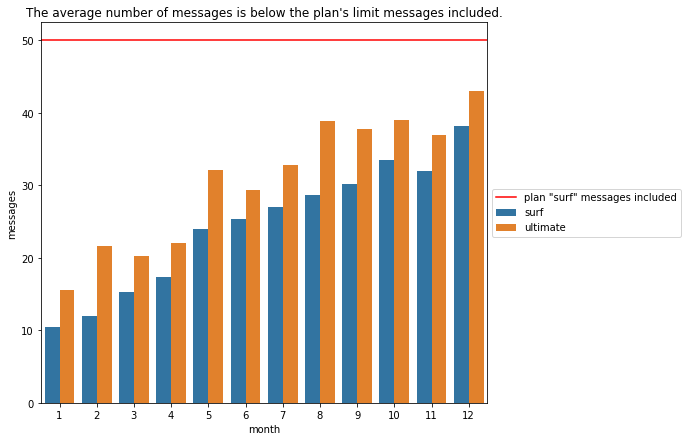

In [42]:
# Compare the average number of messages users of each plan tend to send each month
messagess_avg_number_monthly = pd.DataFrame(users_used.groupby(['plan','month'])['messages'].mean()).reset_index()

fig, ax = plt.subplots(figsize=(8,7))
ax = sns.barplot(data = messagess_avg_number_monthly, x='month', y='messages', hue = 'plan').set(title="The average number of messages is below the plan's limit messages included.", xlabel= 'month', ylabel='messages')
plt.axhline(y=50, xmin=0, xmax=13, c="red", label= 'plan "surf" messages included')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show();


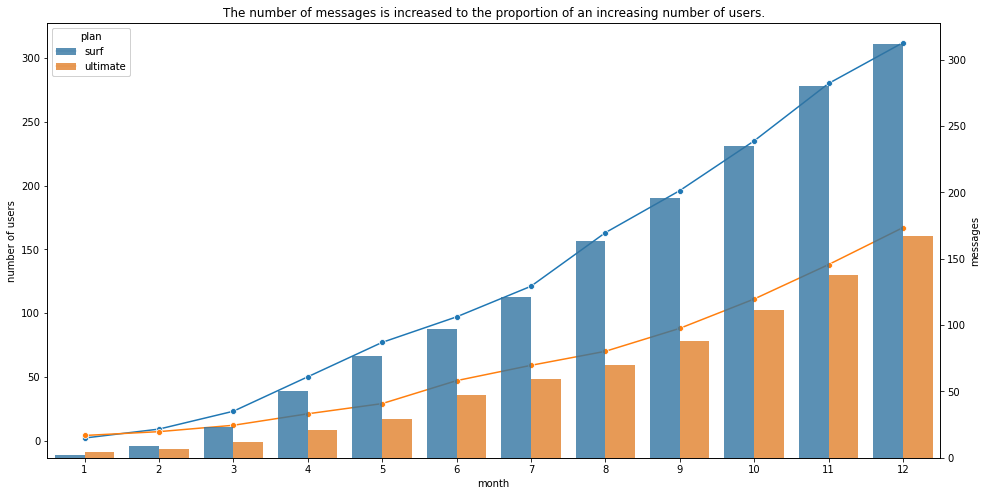

In [43]:
# Compare the number of messages users of each plan require each month. Plot a barchart.
message_monthly_pt = users_used.pivot_table(index = ['plan', 'month'], values=['messages', 'user_id'],aggfunc = 'count').reset_index()
message_monthly_pt.month = message_monthly_pt.month.astype('str')

fig, ax1 = plt.subplots(figsize=(16,8))
sns.lineplot(data=message_monthly_pt, x='month', y='user_id',marker = 'o',hue = 'plan', sort = False, ax=ax1).set(ylabel = 'number of users')
ax2 = ax1.twinx()
sns.barplot(data = message_monthly_pt, x='month', y='messages', hue = 'plan', alpha=0.8, ax=ax2).set(title = 'The number of messages is increased to the proportion of an increasing number of users.', xlabel = 'month', ylabel = 'messages')
plt.show();

[Text(0.5, 1.0, 'Disrtibution of messages by plans'),
 Text(0.5, 0, 'number of messages'),
 Text(0, 0.5, 'frequency')]

[Text(0.5, 1.0, 'Disrtibution of messages by plans'),
 Text(0.5, 0, 'plans'),
 Text(0, 0.5, 'number of messages')]

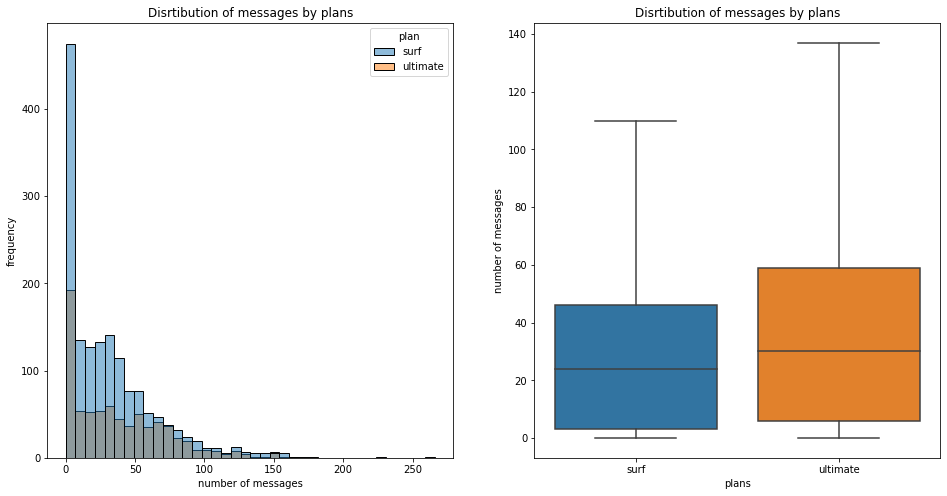

plan,surf,ultimate
mean,30.827476,36.926959
var,1116.887096,1184.280562
std,33.419861,34.413378


----------------------------------------
For plan Surf

Average is  30.83
Varies a lot
Most of the data can be found in range: 0 -  130.0
----------------------------------------

For plan Ultimate

Average is  36.93
Centered around average
Most of the data can be found in range: 0 -  139.0
----------------------------------------


In [44]:
# Calculate the mean and the variance of the monthly number of messages

fig, axes = plt.subplots(1, 2, figsize=(16, 8))
sns.histplot(users_used, x='messages', hue="plan", ax=axes[0]).set(title ='Disrtibution of messages by plans', xlabel='number of messages', ylabel='frequency' )
sns.boxplot(data = users_used, x ='plan', y='messages', showfliers = False, ax=axes[1]).set(title ='Disrtibution of messages by plans', xlabel='plans', ylabel='number of messages' )
plt.show()
print()
plans_stat_messages = users_used.groupby('plan')['messages'].agg(['mean', 'var', 'std']).T
plans_stat_messages
print('----------------------------------------')
print('For plan Surf')
print()
print(f'Average is ', plans_stat_messages.iloc[0, 0].round(2))
cv_messages_surf = users_used.loc[users_used.plan == 'surf', 'messages'].std()/users_used.loc[users_used.plan == 'surf', 'messages'].mean()
if cv_messages_surf>1:
    print("Varies a lot")
else:
    print('Centered around average')
    
if (plans_stat_messages.iloc[0, 0] - 3*plans_stat_messages.iloc[2, 0]) < 0:
    print(f'Most of the data can be found in range: 0 - ', plans_stat_messages.iloc[0, 0].round(0) + 3*plans_stat_messages.iloc[2, 0].round(0))
else:
    print(f'Most of the data can be found in range: ', (plans_stat_messages.iloc[0, 0].round(0) - 3*plans_stat_messages.iloc[2, 0].round(0), plans_stat_messages.iloc[0, 0].round(0) + 3*plans_stat_messages.iloc[2, 0].round(0)))
print('----------------------------------------')
print()
print('For plan Ultimate')
print()
print(f'Average is ', plans_stat_messages.iloc[0, -1].round(2))
cv_messages_ultimate = users_used.loc[users_used.plan == 'ultimate', 'messages'].std()/users_used.loc[users_used.plan == 'ultimate', 'messages'].mean()
if cv_messages_ultimate>1:
    print("Varies a lot")
else:
    print('Centered around average')
    
if (plans_stat_messages.iloc[0, -1] - 3*plans_stat_messages.iloc[2, -1]) < 0:
    print(f'Most of the data can be found in range: 0 - ', plans_stat_messages.iloc[0, -1].round(0) + 3*plans_stat_messages.iloc[2, -1].round(0))
else:
    print(f'Most of the data can be found in range: ', (plans_stat_messages.iloc[0, -1].round(0) - 3*plans_stat_messages.iloc[2, -1].round(0), plans_stat_messages.iloc[0, -1].round(0) + 3*plans_stat_messages.iloc[2, -1].round(0)))
print('----------------------------------------')

So we can see that ultra **(37)** plan users, on average, sent more messages than **(31)** surf plan users. Wherein most of the user surf's plan can be found in the range of 0 -  130.0, for the user ultimate's plan in the range of 0 - 139.0.\
The total number of messages grew in proportion to the growth in the number of users, except for December. In December, we see a strong increase in the number of messages among users of the Ultra platform. I guess this is temporary.\
What is interesting is the large standard deviation for both plans, which in turn makes the coefficient of variation reading close to 1.
The ultimate plan is 0.93 and the surf plan is 1.08, which tells us that the deviation range is very large.\
In a nutshell - ultra plan users send messages more often than surf plan users, but judging by the high coefficient of variation - this service is not the most popular service for users of both plans. This is also evidenced by the fact that the limit on the number of messages per month has not been fully taken by users of any plan.

### Internet

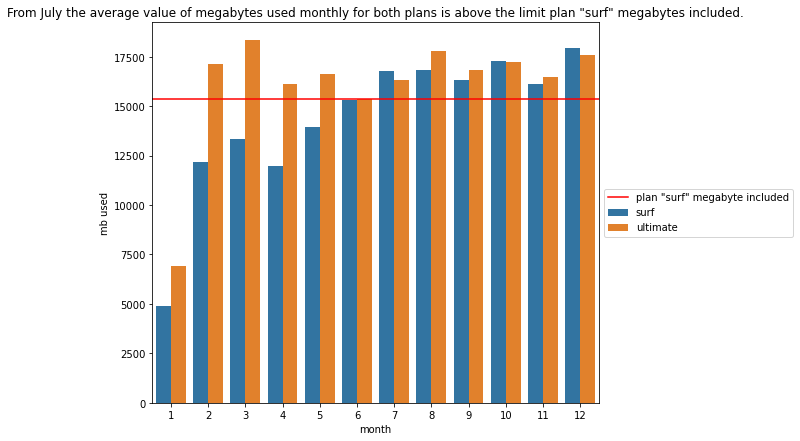

In [45]:
# Compare the average values of megabute used of each plan tend to used each month
internet_avg_value_monthly = pd.DataFrame(users_used.groupby(['plan','month'])['mb_used'].mean()).reset_index()

fig, ax = plt.subplots(figsize=(8,7))
ax = sns.barplot(data = internet_avg_value_monthly, x='month', y='mb_used', hue = 'plan').set(title = 'From July the average value of megabytes used monthly for both plans is above the limit plan "surf" megabytes included.', xlabel='month', ylabel='mb used')
plt.axhline(y=15360, xmin=0, xmax=13, c="red", label= 'plan "surf" megabyte included')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show();

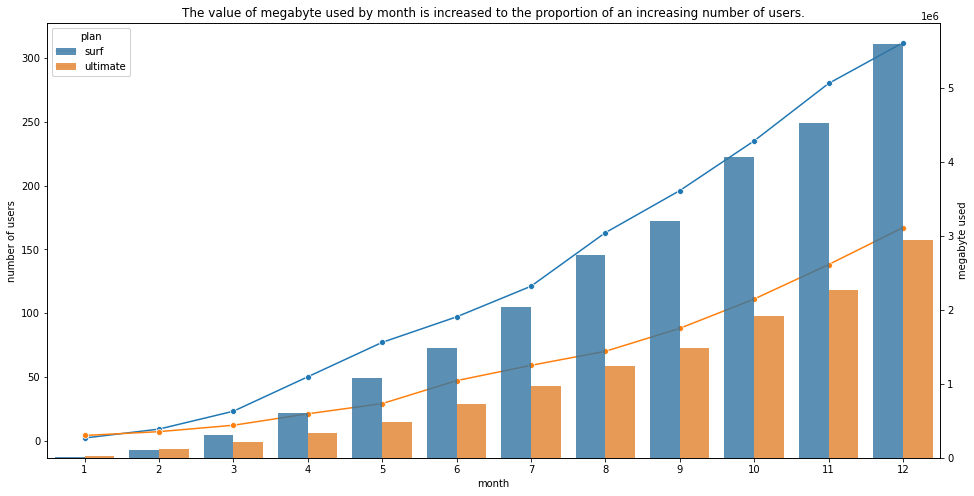

In [46]:
# Compare the values of megabute used of each plan require each month. Plot a barchart.
megabyte_monthly_pt = users_used.pivot_table(index = ['plan', 'month'], values=['mb_used', 'user_id'],aggfunc = {'mb_used':'sum', 'user_id':'count'}).reset_index()
megabyte_monthly_pt.month = megabyte_monthly_pt.month.astype('str')

fig, ax1 = plt.subplots(figsize=(16,8))
sns.lineplot(data=megabyte_monthly_pt, x='month', y='user_id',marker = 'o',hue = 'plan', sort = False, ax=ax1).set(ylabel = 'number of users')
ax2 = ax1.twinx()
sns.barplot(data = megabyte_monthly_pt, x='month', y='mb_used', hue = 'plan', alpha=0.8, ax=ax2).set(title = 'The value of megabyte used by month is increased to the proportion of an increasing number of users.', xlabel = 'month', ylabel = 'megabyte used')
plt.show();

[Text(0.5, 1.0, 'Disrtibution of megabyte by plans'),
 Text(0.5, 0, 'values of megabyte used'),
 Text(0, 0.5, 'frequency')]

[Text(0.5, 1.0, 'Disrtibution of megabyte by plans'),
 Text(0.5, 0, 'plans'),
 Text(0, 0.5, 'values of megabyte used')]

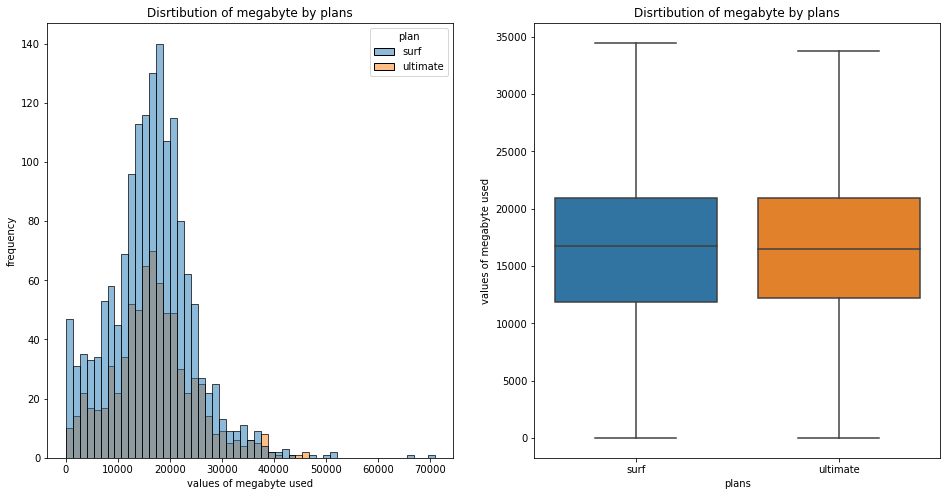

plan,surf,ultimate
mean,16434.0,16895.0
var,64317716.0,64117818.0
std,8020.0,8007.0


----------------------------------------
For plan Surf

Average is  16433.69
Centered around average
Most of the data can be found in range: 0 -  40494.0
----------------------------------------

For plan Ultimate

Average is  16895.14
Centered around average
Most of the data can be found in range: 0 -  40916.0
----------------------------------------


In [47]:
# Calculate the mean and the variance of the monthly values of megabyte

fig, axes = plt.subplots(1, 2, figsize=(16, 8))
sns.histplot(users_used, x='mb_used', hue="plan", ax=axes[0]).set(title ='Disrtibution of megabyte by plans', xlabel='values of megabyte used', ylabel='frequency' )
sns.boxplot(data = users_used, x ='plan', y='mb_used', showfliers = False, ax=axes[1]).set(title ='Disrtibution of megabyte by plans', xlabel='plans', ylabel='values of megabyte used' );
plt.show()
print()
plans_stat_mb = users_used.groupby('plan')['mb_used'].agg(['mean', 'var', 'std']).T
plans_stat_mb.round(0)
print('----------------------------------------')
print('For plan Surf')
print()
print(f'Average is ', plans_stat_mb.iloc[0, 0].round(2))
cv_mb_surf = users_used.loc[users_used.plan == 'surf', 'mb_used'].std()/users_used.loc[users_used.plan == 'surf', 'mb_used'].mean()
if cv_mb_surf>1:
    print("Varies a lot")
else:
    print('Centered around average')
    
if (plans_stat_mb.iloc[0, 0] - 3*plans_stat_mb.iloc[2, 0]) < 0:
    print(f'Most of the data can be found in range: 0 - ', plans_stat_mb.iloc[0, 0].round(0) + 3*plans_stat_mb.iloc[2, 0].round(0))
else:
    print(f'Most of the data can be found in range: ', (plans_stat_mb.iloc[0, 0].round(0) - 3*plans_stat_mb.iloc[2, 0].round(0), plans_stat_mb.iloc[0, 0].round(0) + 3*plans_stat_mb.iloc[2, 0].round(0)))
print('----------------------------------------')
print()
print('For plan Ultimate')
print()
print(f'Average is ', plans_stat_mb.iloc[0, -1].round(2))
cv_mb_ultimate = users_used.loc[users_used.plan == 'ultimate', 'mb_used'].std()/users_used.loc[users_used.plan == 'ultimate', 'mb_used'].mean()
if cv_mb_ultimate>1:
    print("Varies a lot")
else:
    print('Centered around average')
    
if (plans_stat_mb.iloc[0, -1] - 3*plans_stat_mb.iloc[2, -1]) < 0:
    print(f'Most of the data can be found in range: 0 - ', plans_stat_mb.iloc[0, -1].round(0) + 3*plans_stat_mb.iloc[2, -1].round(0))
else:
    print(f'Most of the data can be found in range: ', (plans_stat_mb.iloc[0, -1].round(0) - 3*plans_stat_mb.iloc[2, -1].round(0), plans_stat_mb.iloc[0, -1].round(0) + 3*plans_stat_mb.iloc[2, -1].round(0)))
print('----------------------------------------')

Well. We can see that ultra plan users and surf plan users, on average, used almost equal values of megabytes: 16895 and 16433 responsibly. Wherein most of the user ultimate's plan can be found in the range of 0 -  40916.0, for the user surf's plan is in the range of 0 - 40494.0.\
With the increase in the total value of used megabytes - again no one is surprised. They grew in proportion to the growth in the number of users.\
The distribution showed that Internet consumption is practically the same for users of both plans.
The short story tells: consumers of both plans consume approximately the same amount of megabytes, and it is above the monthly consumption limit for the surf plan. This is the only service whose consumption has exceeded at least one limit, which indicates its popularity among users.

## Revenue

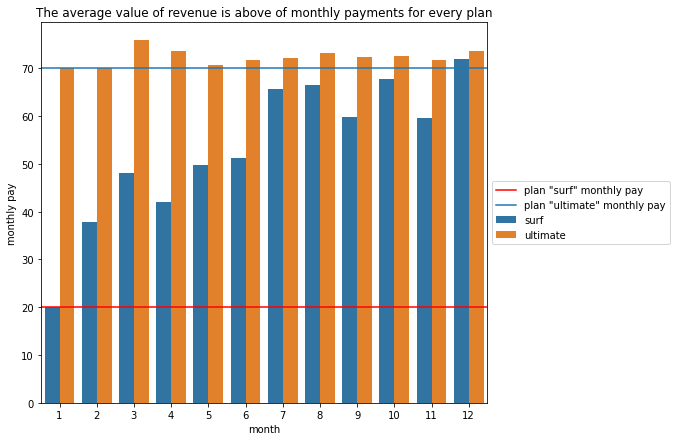

In [48]:
# Compare the average values of revenue gets from each plan.
revenue_avg_value_monthly = pd.DataFrame(users_used.groupby(['plan','month'])['total_cost'].mean()).reset_index()

fig, ax = plt.subplots(figsize=(8,7))
ax = sns.barplot(data = revenue_avg_value_monthly, x='month', y='total_cost', hue = 'plan').set(title = 'The average value of revenue is above of monthly payments for every plan', xlabel='month', ylabel='monthly pay')
plt.axhline(y=20, xmin=0, xmax=13, c="red", label= 'plan "surf" monthly pay')
plt.axhline(y=70, xmin=0, xmax=13,  label= 'plan "ultimate" monthly pay')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));


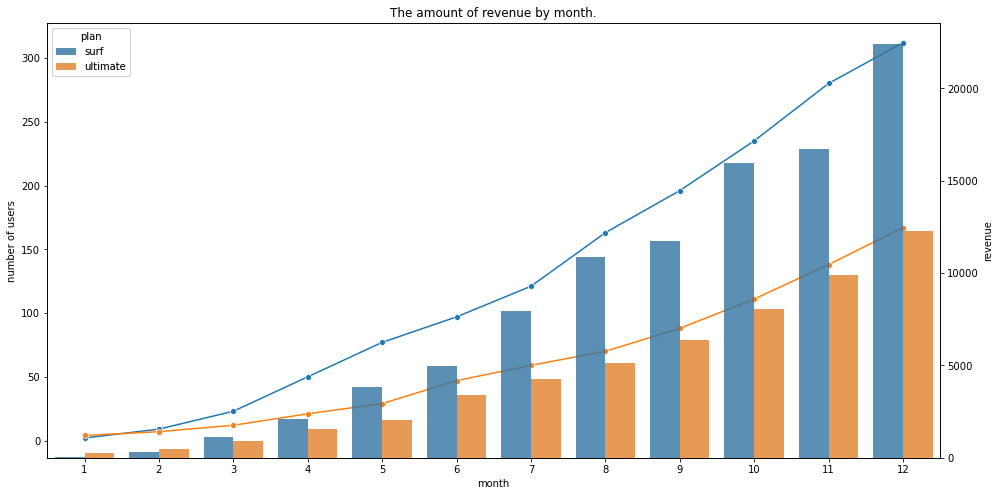

In [49]:
# Compare the values of revenue each plan gets each month. Plot a bar chart.
revenue_monthly_pt = users_used.pivot_table(index = ['plan', 'month'], values=['total_cost', 'user_id'],aggfunc = {'total_cost':'sum', 'user_id':'count'}).reset_index()
revenue_monthly_pt.month = revenue_monthly_pt.month.astype('str')

fig, ax1 = plt.subplots(figsize=(16,8))
sns.lineplot(data=revenue_monthly_pt, x='month', y='user_id',marker = 'o',hue = 'plan', sort = False, ax=ax1).set(ylabel = 'number of users')
ax2 = ax1.twinx()
sns.barplot(data = revenue_monthly_pt, x='month', y='total_cost', hue = 'plan', alpha=0.8, ax=ax2).set(title = 'The amount of revenue by month.', xlabel = 'month', ylabel = 'revenue')
plt.show();

[Text(0.5, 1.0, 'Disrtibution of amount of revenue by plans'),
 Text(0.5, 0, 'amount of revenue'),
 Text(0, 0.5, 'frequency')]

[Text(0.5, 1.0, 'Disrtibution of amount of revenue by plans'),
 Text(0.5, 0, 'plans'),
 Text(0, 0.5, 'amount of revenue')]

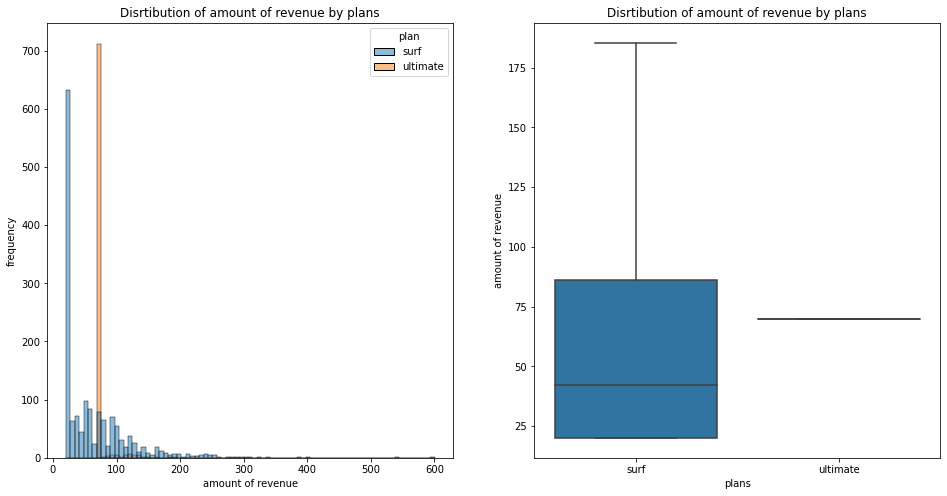

plan,surf,ultimate
mean,62.600083,72.565737
var,3293.610959,155.394942
std,57.389990,12.465751


----------------------------------------
For plan Surf

Average is  62.6
Centered around average
Most of the data can be found in range: 0 -  234.0
----------------------------------------

For plan Ultimate

Average is  72.57
Centered around average
Most of the data can be found in range: 37.0 - 109.0
----------------------------------------


In [50]:
# Calculate the mean and the variance of the monthly revenue.

fig, axes = plt.subplots(1, 2, figsize=(16, 8))
sns.histplot(users_used, x='total_cost', hue="plan", ax=axes[0]).set(title ='Disrtibution of amount of revenue by plans', xlabel='amount of revenue', ylabel='frequency' )
sns.boxplot(data = users_used, x ='plan', y='total_cost', showfliers = False, ax=axes[1]).set(title ='Disrtibution of amount of revenue by plans', xlabel='plans', ylabel='amount of revenue' )
plt.show()
print()
plans_stat_rev = users_used.groupby('plan')['total_cost'].agg(['mean', 'var', 'std']).T
plans_stat_rev
print('----------------------------------------')
print('For plan Surf')
print()
print(f'Average is ', plans_stat_rev.iloc[0, 0].round(2))
cv_rev_surf = users_used.loc[users_used.plan == 'surf', 'total_cost'].std()/users_used.loc[users_used.plan == 'surf', 'total_cost'].mean()
if cv_rev_surf>1:
    print("Varies a lot")
else:
    print('Centered around average')
    
if (plans_stat_rev.iloc[0, 0] - 3*plans_stat_rev.iloc[2, 0]) < 0:
    print(f'Most of the data can be found in range: 0 - ', plans_stat_rev.iloc[0, 0].round(0) + 3*plans_stat_rev.iloc[2, 0].round(0))
else:
    print(f'Most of the data can be found in range: ', (plans_stat_rev.iloc[0, 0].round(0) - 3*plans_stat_rev.iloc[2, 0].round(0), plans_stat_rev.iloc[0, 0].round(0) + 3*plans_stat_rev.iloc[2, 0].round(0)))
print('----------------------------------------')
print()
print('For plan Ultimate')
print()
print(f'Average is ', plans_stat_rev.iloc[0, -1].round(2))
cv_rev_ultimate = users_used.loc[users_used.plan == 'ultimate', 'total_cost'].std()/users_used.loc[users_used.plan == 'ultimate', 'total_cost'].mean()
if cv_rev_ultimate>1:
    print("Varies a lot")
else:
    print('Centered around average')
    
if (plans_stat_rev.iloc[0, -1] - 3*plans_stat_rev.iloc[2, -1]) < 0:
    print(f'Most of the data can be found in range: 0 - {plans_stat_rev.iloc[0, -1].round(0) + 3*plans_stat_rev.iloc[2, -1].round(0)}')
else:
    print(f'Most of the data can be found in range: {plans_stat_rev.iloc[0, -1].round(0) - 3*plans_stat_rev.iloc[2, -1].round(0)} - {plans_stat_rev.iloc[0, -1].round(0) + 3*plans_stat_rev.iloc[2, -1].round(0)}')
print('----------------------------------------')

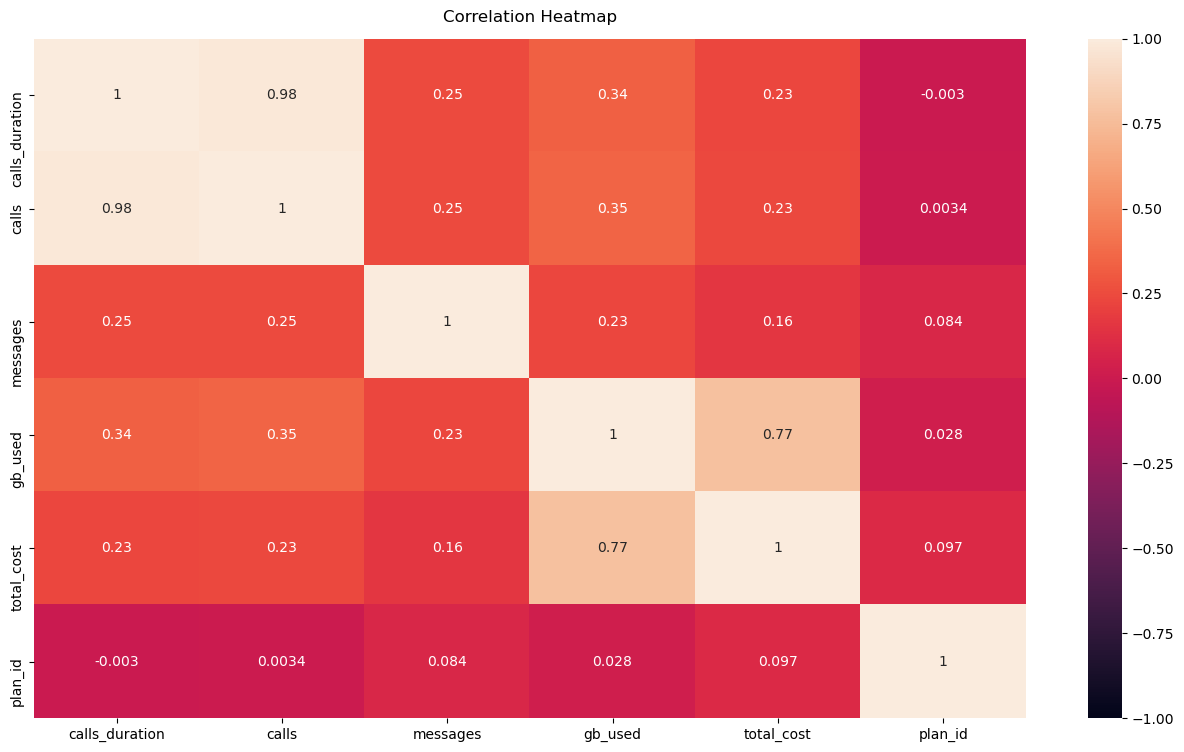

In [51]:
users_used['plan_id'] = users_used.plan.map(plans_dictionary)
figure(figsize=(16, 9), dpi=100)
heatmap = sns.heatmap(users_used[['calls_duration', 'calls', 'messages', 'gb_used', 'total_cost', 'plan_id']].corr(), vmin=-1, vmax=1, annot=True) 
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

So we got to the most interesting - revenue.\
We see that the average revenue for each plan exceeds the corresponding monthly payment, but the question is how much? The surf plan is three times the excess (**62** with a monthly payment of **20**). The ultimate plan costs users **73** on average with a monthly payment of **70**. From this, I will conclude that for the ultimate, exceeding the limit is rather an accident, but for users of the surf plan, this is a systemic character.\
Total revenue grew along with the number of users, no surprises here.
The distribution plot shows that this is a normal distribution with positive kurtosis and right-hand skewness.\
The heat map of the correlation showed that revenue has a strong correlation with the Internet consumption indicator.\
Summing up.\
The average user payment for the surf plan is **62.6**, which is almost equal to the monthly payment for the ultimate plan. At the same time, users of the ultimate plan pay a little extra. Prima facie, it is worth changing the plan from the surf to the ultimate.\
!But\
We're looking at averages, so we need to take a closer look. The main factor that leads to this is the amount of Internet consumed.\
So let's count.\
The difference between the ultimate plan and the surf plan is 70 - 20 = 50 dollars. With the price for plan-surf 1 GB - 10 dollars - this is an additional 5 GB of traffic.\
For all users whose average consumption is more than 20 GB / month, it is more profitable to switch to the ultimate plan. Accordingly, for all users, whose monthly Internet consumption is below 20 GB, it is better to switch to the surf plan and not overpay.

In [52]:
# make a slices for surf's plan users
check_users_surf = users_used.query('plan == "surf"').groupby(['user_id'])['gb_used'].mean().reset_index()
check_users_surf_20 = check_users_surf.query('gb_used > 20')

# make a slices for ultimate's plan users
check_users_ultimate = users_used.query('plan == "ultimate"').groupby(['user_id'])['gb_used'].mean().reset_index()
check_users_ultimate_20 = check_users_ultimate.query('gb_used <= 20')

#print conclusion
print(f"It would be better to change a plan to another one for {len(check_users_surf_20)} surf's plan users\
 and {len(check_users_ultimate_20)} ultimate's plan users. This is {len(check_users_surf_20)/len(check_users_surf):.2%}\
  and {len(check_users_ultimate_20)/len(check_users_ultimate):.2%} of their number respectively.")

It would be better to change a plan to another one for 64 surf's plan users and 141 ultimate's plan users. This is 18.77%  and 80.11% of their number respectively.


Well, we see that 80% (141 users) of the users of the ultimate plan are overpaying. At the same time, among the users of the surf plan, there are only 18% of them (64 users). Obviously, given the structure of consumption, the surf plan turned out to be more profitable for users.

## Test statistical hypotheses

**Test_1**\
**The hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs.**

*Null Hypothesis:* There is no difference between the average revenue from users of Ultimate and Surf calling plans.

*Alternative hypothesis:* Average revenue per month for ultimate users is not the same as the average revenue per month for surf users.

*Critical statistical significance level* = 0.05

As that depends it is used to compare the means of two groups in order to determine whether two groups are different from one another we will use a *t-test*. 

In [53]:
# At first, make the function with levene test for recognizing equal of variance and with t-test
def t_test(sample1,sample2,alpha=0.05):
    p_value_levene=st.levene(sample1, sample2).pvalue
    if p_value_levene<alpha:
        option_var=False
    else:
        option_var=True
    p_value=st.ttest_ind(sample1, sample2,nan_policy='omit',equal_var=option_var).pvalue
    if p_value<alpha:
        print(f'Reject H0: average of sample 1 is not equal to average of sample 2')
    else:
        print( "Fail to Reject H0: We don't have enough evidence to say that averages of sample 1 \
  and sample 2 are not the same")
    print(f'P-value is {p_value}')
        
# let's make two sample
rev_surf = users_used.loc[users_used.plan == 'surf', 'total_cost']
rev_ultimate = users_used.loc[users_used.plan == 'ultimate', 'total_cost']

# let's make a test
t_test(rev_surf, rev_ultimate)
print(f'Average revenue of surf is {rev_surf.mean()}')
print(f'Average revenue of ultimate is {rev_ultimate.mean()}')


Reject H0: average of sample 1 is not equal to average of sample 2
P-value is 7.166961131078659e-11
Average revenue of surf is 62.60008306709256
Average revenue of ultimate is 72.56573705179282


**Conclusion.**\
I formulated the null hypothesis that there is no difference between the average revenue of users of the surf plan and the ultimate plan. I used a significance level of 0.05. The test gave a much smaller p-value, so I reject the null hypothesis.\
**The average revenue from the surf and the ultimate users is different.**

**Test_2**\
**The hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.**

*Null Hypothesis:* There is no difference between the average revenue from users in the NY-NJ area and the users from the other regions.

*Alternative hypothesis:* Average revenue from users in the NY-NJ area is not the same as from the users from the other regions.

*Critical statistical significance level* = 0.05

As that depends it is used to compare the means of two groups in order to determine whether two groups are different from one another we will use a *t-test*. 

In [54]:
# Test the hypotheses

rev_ny = users_used.loc[users_used.city == 'New York-Newark-Jersey City, NY-NJ-PA MSA', 'total_cost']
rev_not_ny = users_used.loc[users_used.city != 'New York-Newark-Jersey City, NY-NJ-PA MSA', 'total_cost']

t_test(rev_ny, rev_not_ny)
print(f'Average revenue of NY-NJ-PA MSA is {rev_ny.mean()}')
print(f'Average revenue of other MSA is {rev_not_ny.mean()}')


Fail to Reject H0: We don't have enough evidence to say that averages of sample 1   and sample 2 are not the same
P-value is 0.080875776174523
Average revenue of NY-NJ-PA MSA is 61.932898172323796
Average revenue of other MSA is 66.61024806201549


**Conclusion.**\
I formulated the null hypothesis that there is no difference between the average revenue from users in the NY-NJ area and the users from the other regions. I used a significance level of 0.05. The test gave a greater p-value, so I fail to reject the null hypothesis.\
**The average revenue from users in the NY-NJ area and the users from the other regions are not different.**

## General conclusion

During the project, we loaded 5 date frames, filled in the missing values, changed the data type for data related to dates. We found out that some users changed the plan during the year, therefore, columns with dates and the plan were added to the data frames. We calculated the monthly consumption of calls, messages and the Internet for each user, and based on this, we already calculated the monthly revenue.

After that, we conducted exploratory and statistical analyzes and found that, if measured by the average, the behavior of users of both plans regarding **calls** is very similar. Surf plan users make an average of 54 calls, with an average duration of 425 minutes. Users of the ultimate plan also make 54 calls on average, but with an average duration of 424 minutes. But at the same time, users of the ultimate plan have more dispersion of the call duration, which indicates their freer behavior.

In terms of **messages**, on average, users of the surf plan send fewer messages than users of the ultimate plan, 31 messages versus 37 messages respectively. But the dispersion turned out to be stronger among the users of the surf plan, showing a coefficient of variation greater than one (1.08). True, even for the users of the ultimate plan, he almost almost reached one unit (0.93). In general, I would say that users of both plans do not pay attention to how they consume this service.

**Internet.**\
Like calls, the averages differ little - 16GB for surf users, and 17GB for users of the ultimate plan. The standard deviation also does not delight us with a big diversity: 8020 at the surf and 8007 at the ultimate. 

**Revenue.**\
If you look at the nominal average revenue, then here it is more for users of the ultimate plan - 73 dollars, against 63 dollars for users of the surf plan. But I would rate it differently. I would ask the question - how much, on average, additional revenue (revenue over the monthly payment) is brought by users of each plan. And those users of the surf plan are far ahead - $43, against $3 for users of the ultimate plan.

We then carried out statistical tests.
In the first test, we checked whether the average revenue differs between users of the surf and ultimate plugins. The resulting p_value turned out to be lower than the critical statistical significance level = 0.05 , and we had to reject the null hypothesis that the average revenues are equal.
In the second test, we checked whether the average revenue differs between users in the NY-NJ area and other regions. In this test, p_value turned out to be higher than the critical statistical significance level = 0.05, and we could not reject the null hypothesis that the average revenue for them is equal.
!BUT
Here it is worth clarifying that we compared the NY-NJ area and the totality of ALL other regions. Do not think that the average revenue is equal for all regions.

Summing up the research, I want to say:
- I didn't find any **significant** differences in user behavior between the two plans. Perhaps an analysis by age category will give us more understanding of their differences.
- Only the indicator of consumed Internet showed a strong correlation with revenue. It is the consumption of Internet that brings the company additional revenue.
- About 41% of users overpay for the company's services (either paying a lot for the Internet, or paying a lot for a plan). I would approach users with a proposal to change the plan, and an explanation of why. This should increase user confidence in our company.
- It is worth doing more research why we have a drop in the number of users in the 26-35 age group.
